# Classification Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DS_C12_S2_Classification_BankChurn_Data_Project.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 13)

In [4]:
df.drop(['CustomerId','Surname' ], axis = 1, inplace = True)

In [5]:
df['Geography'].replace(['france','fra'],'France', inplace=True)

In [6]:
df['Geography'].replace(['ger', 'germany','gernamy', 'GERMANY'],'Germany', inplace=True)

In [7]:
df['Geography'].replace(['spain', 'espanio'],'Spain', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values so no value treatment is required on any categorical or numerical features.

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.duplicated().sum()

0

None Duplicated values found.

In [13]:
#Non-numerical label columns into categorical columns
def dtype(df):
    cat = []
    con = []
    for col in df:
        if (df[col].nunique() <14):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(df)
table = [cat,con]
print(tabulate({"categorical":cat, "continuous":con}, headers=["Category", "Continuous"]))

Category        Continuous
--------------  ---------------
Geography       CreditScore
Gender          Age
Tenure          Balance
NumOfProducts   EstimatedSalary
HasCrCard
IsActiveMember
Exited


In [14]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### EDA

In [15]:
def cat_info(col):
    print(f'Unique values in {col} :{df[col].nunique()}')
    print(f'Missing values count for {col} : {df[col].isnull().sum()}')
    print(f'Mode of {col} : {df[col].mode()[0]}')
    print()
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100

    
def visual(col):
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.xticks(rotation = 90)
    plt.title(f'Value count of {col}')
    
    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')
def main_cat(col):   
    cat_info(col)
    visual(col)

Unique values in Geography :3
Missing values count for Geography : 0
Mode of Geography : France

Unique values in Gender :2
Missing values count for Gender : 0
Mode of Gender : Male

Unique values in Tenure :11
Missing values count for Tenure : 0
Mode of Tenure : 2

Unique values in NumOfProducts :4
Missing values count for NumOfProducts : 0
Mode of NumOfProducts : 1

Unique values in HasCrCard :2
Missing values count for HasCrCard : 0
Mode of HasCrCard : 1

Unique values in IsActiveMember :2
Missing values count for IsActiveMember : 0
Mode of IsActiveMember : 1

Unique values in Exited :2
Missing values count for Exited : 0
Mode of Exited : 0



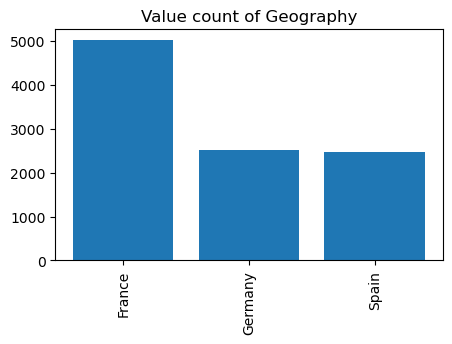

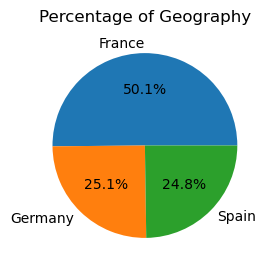

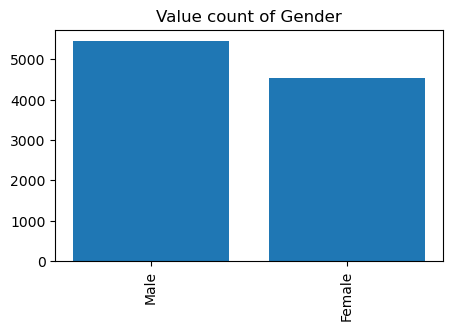

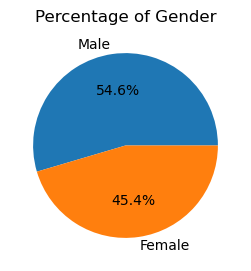

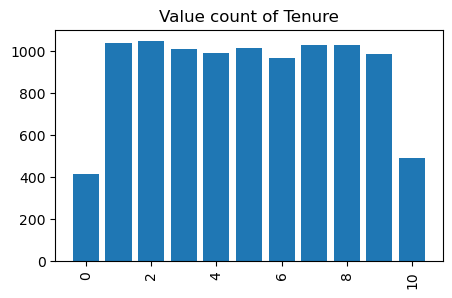

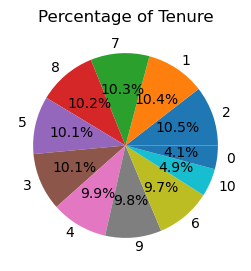

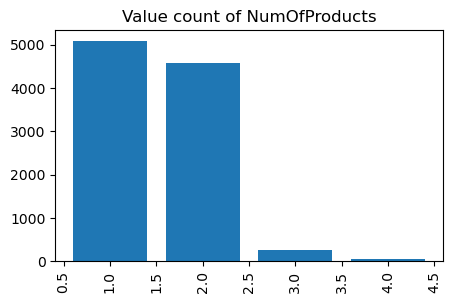

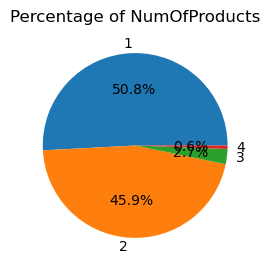

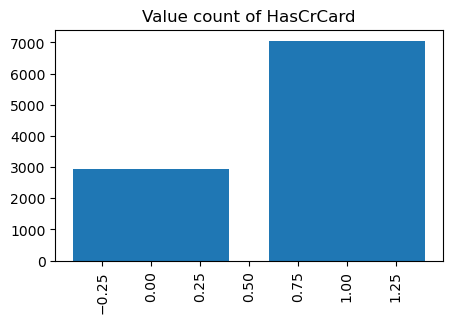

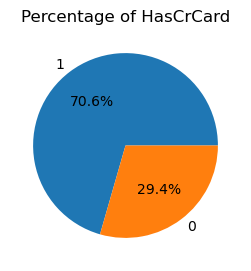

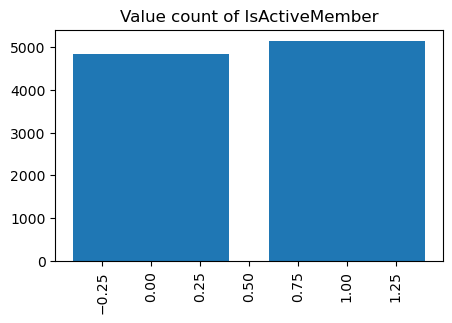

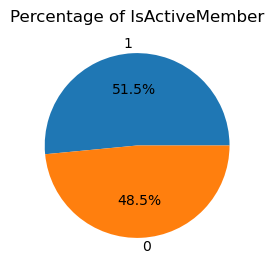

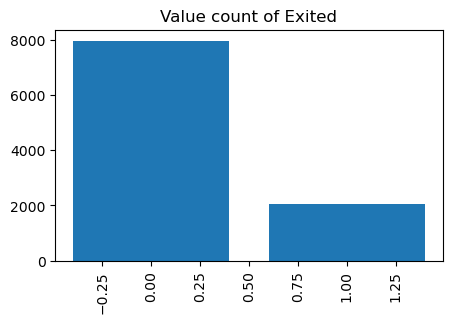

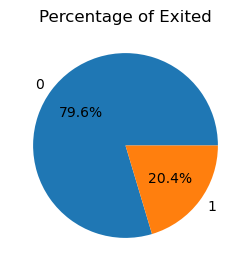

In [16]:
for i in cat:
    main_cat(i)


In [17]:
def num_info(col):
    print(col)
    print("Mean", df[col].mean())
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')
    print()
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def main_num(col):
    num_info(col)
    num_visual(col)

CreditScore
Mean 650.5288
skewness -0.07160660820092675
kurtos -0.42572568480291295

Age
Mean 38.9218
skewness 1.0113202630234552
kurtos 1.3953470615086956

Balance
Mean 76485.88928799961
skewness -0.14110871094154384
kurtos -1.489411767941925

EstimatedSalary
Mean 100090.2398809998
skewness 0.0020853576615585162
kurtos -1.1815184473915485



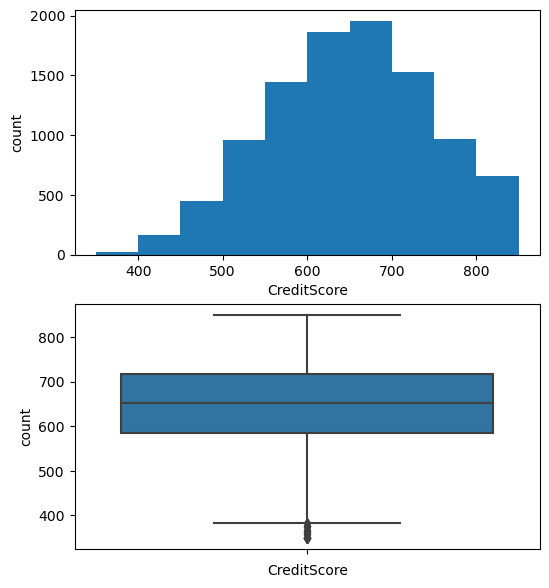

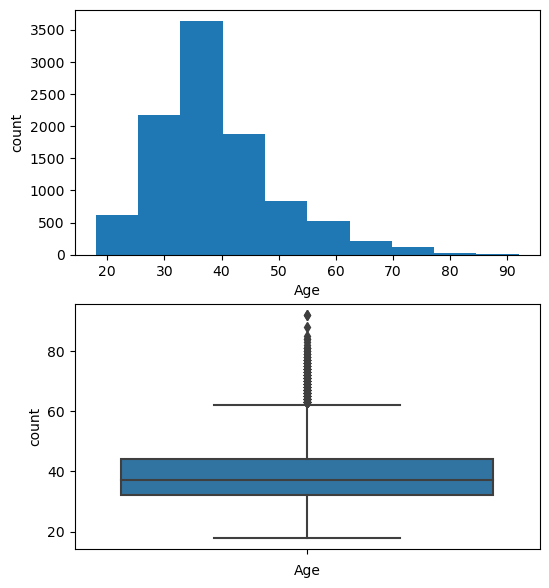

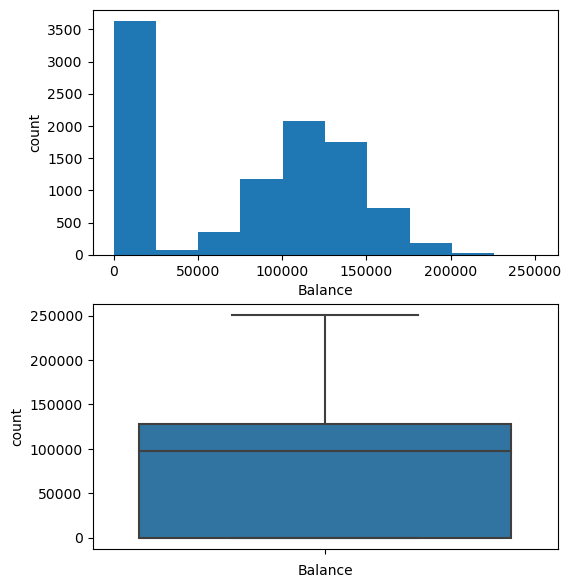

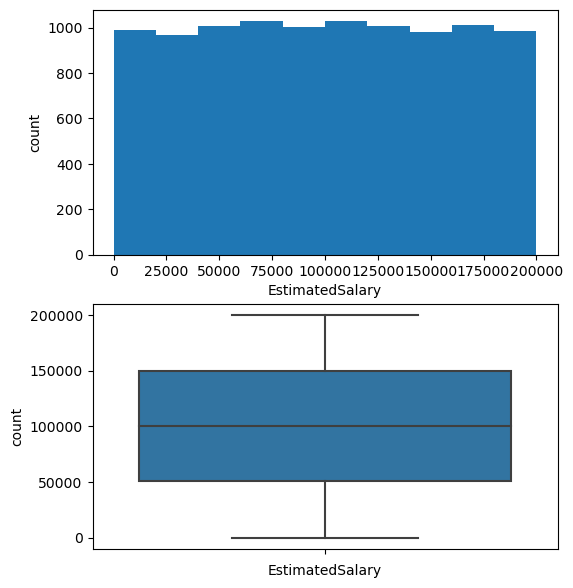

In [18]:
for i in con:
    main_num(i)

**BI - VARIATE ANALYSIS**

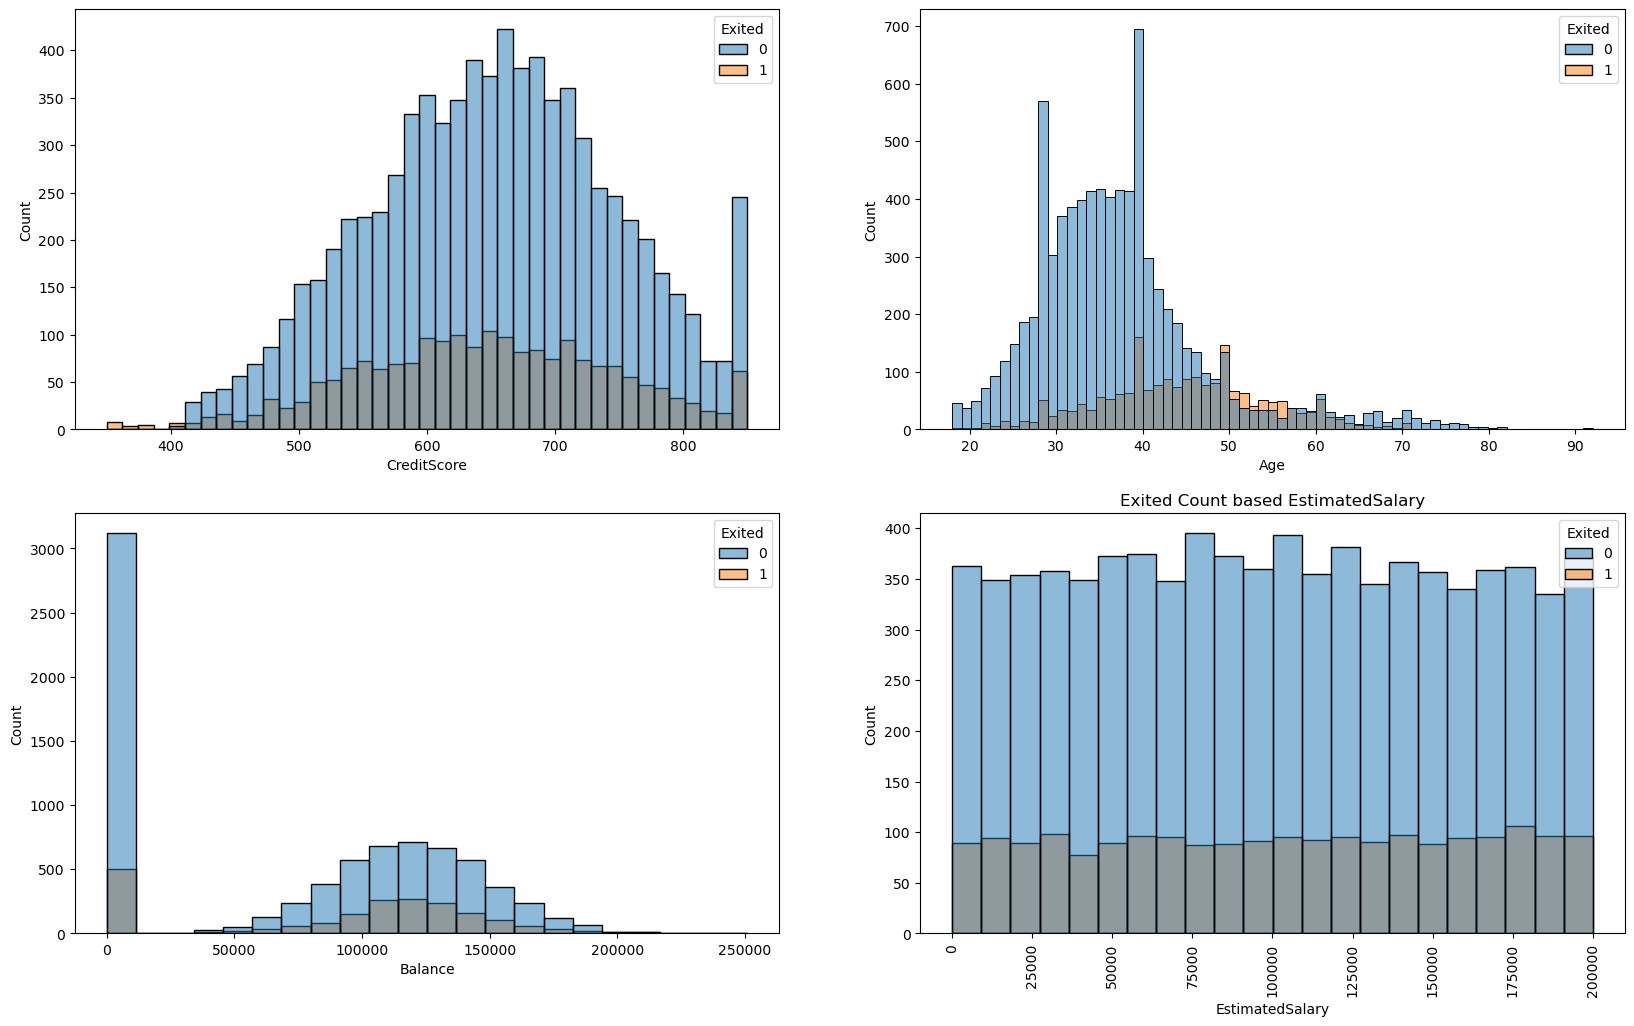

In [19]:
fig, axs = plt.subplots(2,2, figsize = (20,12))
axs = axs.ravel()
j = 0
for i in con:
    sns.histplot(df, hue="Exited", x = i, ax = axs[j])
    j+=1
    plt.title(f'Exited Count based {i}')
    plt.xticks(rotation = 90)
plt.show()

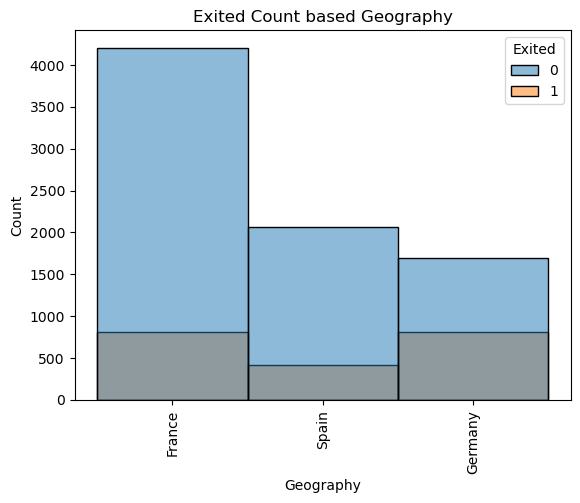

In [20]:
sns.histplot(df, hue="Exited", x = 'Geography')
plt.title('Exited Count based Geography')
plt.xticks(rotation = 90)
plt.show()

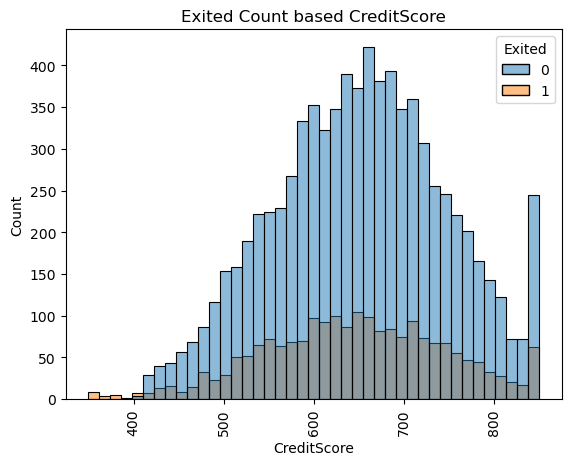

In [21]:
sns.histplot(df, hue="Exited", x = 'CreditScore')
plt.title('Exited Count based CreditScore')
plt.xticks(rotation = 90)
plt.show()

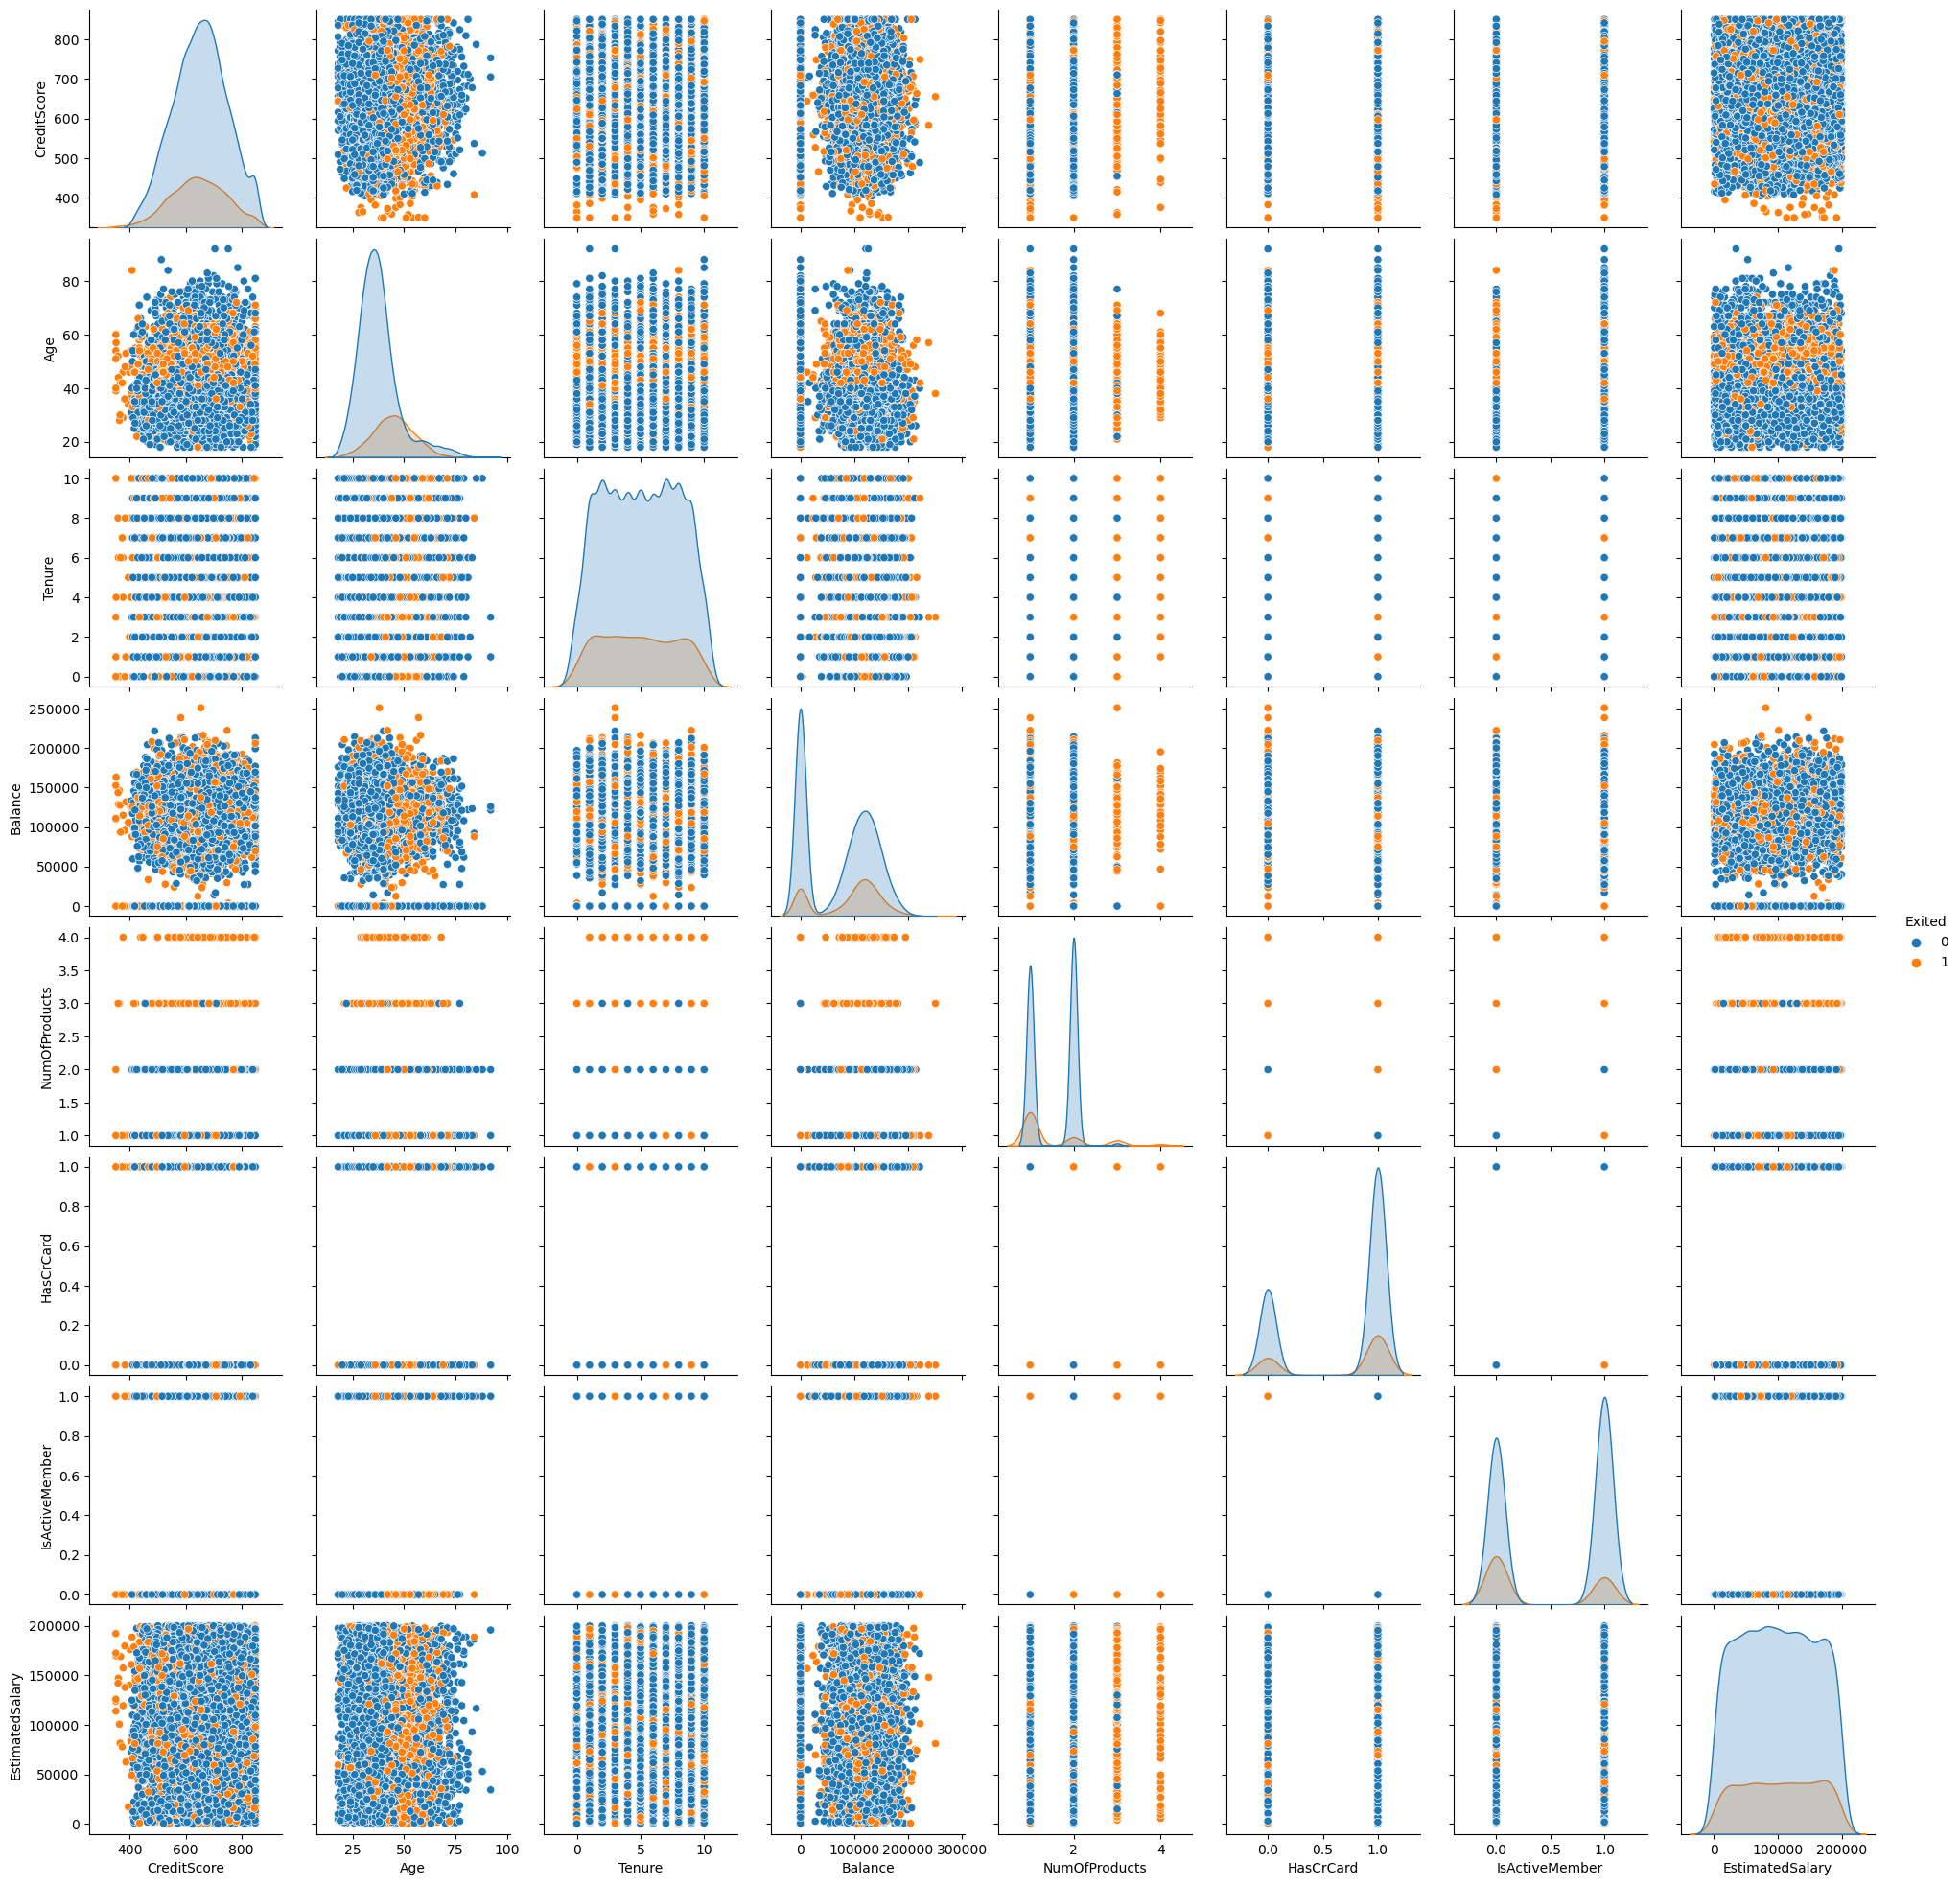

In [22]:
sns.pairplot(df, hue = 'Exited')
plt.show()

**MULTI - VARIATE ANALYSIS**

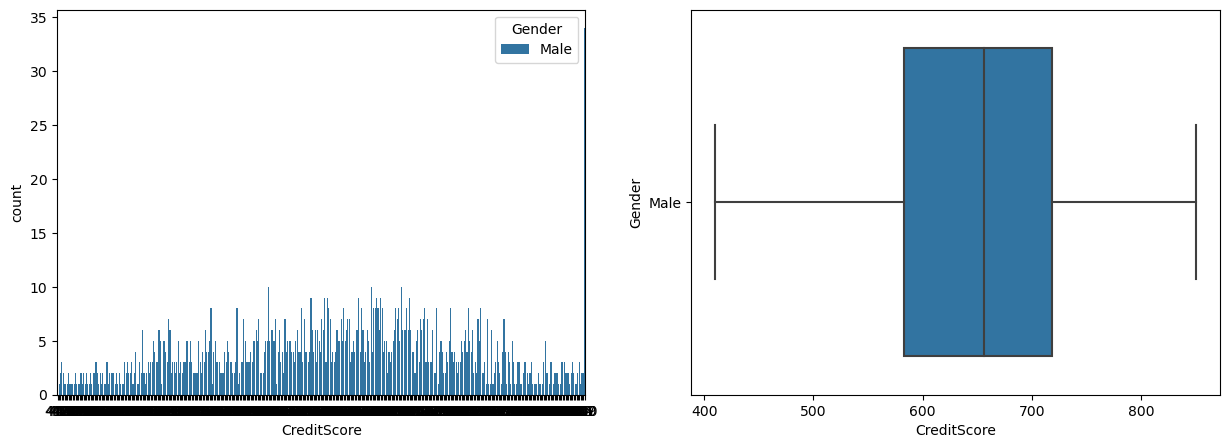

In [23]:
cond1 = df[(df['Geography'] == 'France') & (df['Gender'] == 'Male') & (df['Balance'] >1000)]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='CreditScore',hue='Gender',data=cond1,ax=ax[0])
sns.boxplot(x='CreditScore',y='Gender',data=cond1,ax=ax[1])
plt.show()

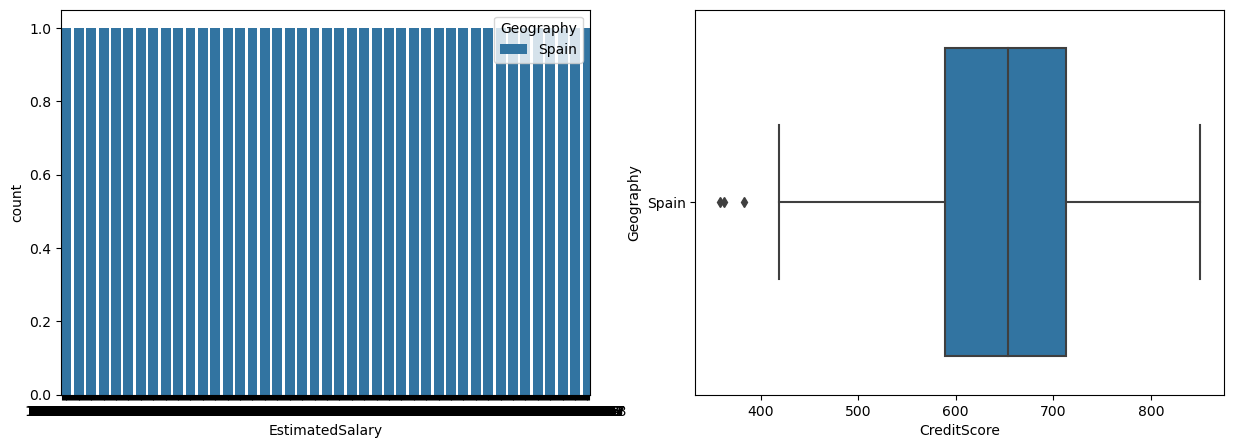

In [24]:
cond2 = df[(df['Geography'] == 'Spain') & (df['Gender'] == 'Female') & (df['EstimatedSalary'] >100000)]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='EstimatedSalary',hue='Geography',data=cond2,ax=ax[0])
sns.boxplot(x='CreditScore',y='Geography',data=cond2,ax=ax[1])
plt.show()

Feature Scaling:

### IM-BALANCE DATA CLASSIFICATION'S

In [25]:
label_encoder = preprocessing.LabelEncoder()
for i in cat:
    df[i] = label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [26]:
num_cat = ['int32', 'float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


In [27]:
corel_matrix = scale_df.corr()
corel_matrix.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001


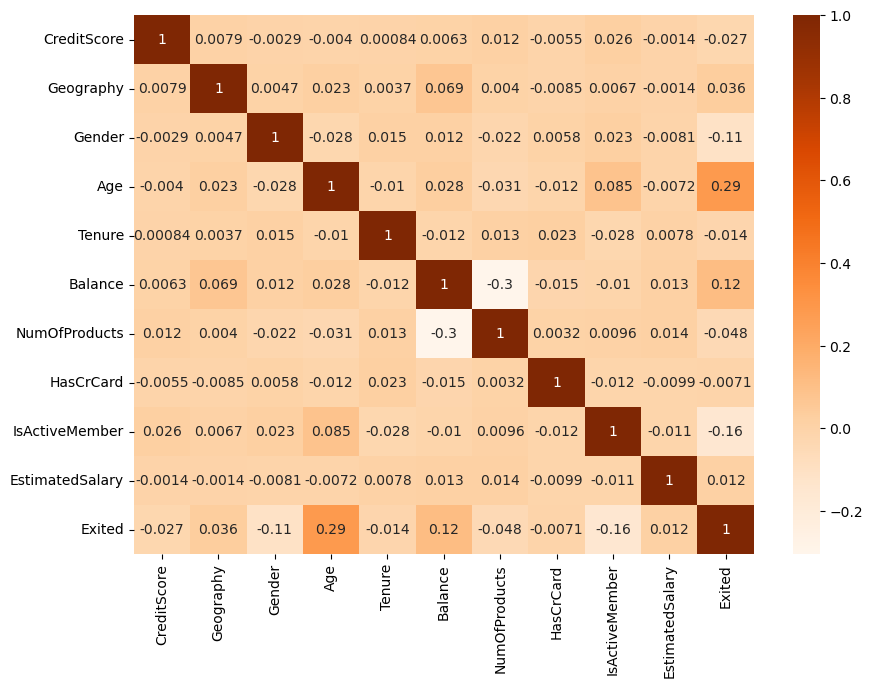

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [29]:
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [30]:
sel_features=correlation(scale_df,0.3)
len(set(sel_features))

1

In [31]:
sel_features

{'NumOfProducts'}

## Balance Data

**Most Features are having Imbalance Data, to Balance the data performed over Sampling - SMOTE process**

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# pip install imblearn

In [45]:
x = scale_df.drop(['Exited'], axis = 1)
y = df['Exited']

In [47]:
os  = SMOTE()
x1, y1 = os.fit_resample(x,y)
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.3, random_state=42)
print(X1_train.shape)
print(y1_train.shape)

(11148, 10)
(11148,)


### Logistic Regression

In [48]:
lr_bal_model=LogisticRegression().fit(X1_train,y1_train)


In [49]:
y_pred_lrbal=lr_bal_model.predict(X1_test)
y_pred_lrbal

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
log_prob_bal = lr_bal_model.predict_proba(X1_test)
log_prob_bal = log_prob_bal[:,1]
r_prob_bal = [0 for _ in range(len(y1_test))]

In [51]:
train_accrcy_score = []
test_accrcy_score = []
test_f1_score = []
auc_roc = []
recall = []
precision = []

In [52]:
lr_bal_actrain = lr_bal_model.score(X1_train, y1_train)
lr_bal_actest = lr_bal_model.score(X1_test, y1_test)

print("train_acc_score", lr_bal_actrain)
train_accrcy_score.append(lr_bal_actrain)

print("test_acc_score", lr_bal_actest)
test_accrcy_score.append(lr_bal_actest)

train_acc_score 0.7044312881234303
test_acc_score 0.7040602762662201


In [53]:
lr_precision = precision_score(y1_test,y_pred_lrbal)
precision.append(lr_precision)
print("Model precision_score :",lr_precision)

Model precision_score : 0.6965632858340318


In [54]:
lr_recall=recall_score(y1_test,y_pred_lrbal)
recall.append(lr_recall)
print("Model recall_score :",lr_recall)

Model recall_score : 0.7066326530612245


In [55]:
f1_test_lrbal = f1_score(y1_test, y_pred_lrbal)
test_f1_score.append(f1_test_lrbal)

print("f1_test_score", f1_test_lrbal)

f1_test_score 0.7015618404390037


In [56]:
ac_rc_score_lr = roc_auc_score(y1_test, y_pred_lrbal)
auc_roc.append(ac_rc_score_lr)
print(ac_rc_score_lr)

0.7040995087235224


In [57]:
print(confusion_matrix(y1_test,y_pred_lrbal))

[[1702  724]
 [ 690 1662]]


In [58]:
print(classification_report(y1_test,y_pred_lrbal))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2426
           1       0.70      0.71      0.70      2352

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



### Naive Bayes

In [59]:
gn_bal_model=GaussianNB().fit(X1_train,y1_train)
y_pred_gnbal=gn_bal_model.predict(X1_test)

In [60]:
gn_bal_actrain = gn_bal_model.score(X1_train, y1_train)
gn_bal_actest = gn_bal_model.score(X1_test, y1_test)

print("br_train_acc_score", gn_bal_actrain)
train_accrcy_score.append(gn_bal_actrain)
print("br_test_acc_score", gn_bal_actest)
test_accrcy_score.append(gn_bal_actest)

br_train_acc_score 0.7440796555435952
br_test_acc_score 0.7450816241105065


In [61]:
f1_test_gnbal = f1_score(y1_test, y_pred_gnbal)
test_f1_score.append(f1_test_gnbal)

print("f1_test_score", f1_test_gnbal)

f1_test_score 0.7426035502958579


In [62]:
gn_precision = precision_score(y1_test,y_pred_gnbal)
precision.append(gn_precision)
print("Model precision_score :",gn_precision)

Model precision_score : 0.7382352941176471


In [63]:
gn_recall=recall_score(y1_test,y_pred_gnbal)
recall.append(gn_recall)
print("Model recall_score :",gn_recall)

Model recall_score : 0.7470238095238095


In [64]:
ac_rc_score_ng = roc_auc_score(y1_test, y_pred_gnbal)
auc_roc.append(ac_rc_score_ng)
print(ac_rc_score_ng)

0.7451112452400581


In [65]:
print(confusion_matrix(y1_test,y_pred_gnbal))

[[1803  623]
 [ 595 1757]]


In [66]:
print(classification_report(y1_test,y_pred_gnbal))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2426
           1       0.74      0.75      0.74      2352

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



### Decision Tree Classifier

In [67]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
dt = DecisionTreeClassifier()

In [69]:
param_grid_dtbal={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)
}

In [70]:
grid_cv_dtbal = GridSearchCV(dt,param_grid_dtbal,cv=kf,scoring="precision")

In [71]:
grid_cv_dtbal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='precision')

In [72]:
grid_cv_dtbal.best_score_

0.8327190879017549

In [73]:
grid_cv_dtbal.best_params_

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [74]:
grid_cv_dtbal.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=50)

In [75]:
dt_bal_model = DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=10)
dt_bal_model.fit(x1,y1)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=10)

In [76]:
dt_bal_actrain = dt_bal_model.score(X1_train, y1_train)
dt_bal_actest = dt_bal_model.score(X1_test, y1_test)

print("dt_train_acc_score", dt_bal_actrain)
train_accrcy_score.append(dt_bal_actrain)
print("dt_test_acc_score", dt_bal_actest)
test_accrcy_score.append(dt_bal_actest)

dt_train_acc_score 0.8439181916038752
dt_test_acc_score 0.8526580159062369


In [77]:
y_pred_dtbal=dt_bal_model.predict(X1_test)

In [78]:
f1_test_dtbal = f1_score(y1_test, y_pred_dtbal)
test_f1_score.append(f1_test_dtbal)

print("f1_test_score", f1_test_dtbal)

f1_test_score 0.8514767932489451


In [79]:
dt_precision = precision_score(y1_test,y_pred_dtbal)
precision.append(dt_precision)
print("Model precision_score :",dt_precision)

Model precision_score : 0.8450586264656617


In [80]:
dt_recall=recall_score(y1_test,y_pred_dtbal)
recall.append(dt_recall)
print("Model recall_score :",dt_recall)

Model recall_score : 0.8579931972789115


In [81]:
ac_rc_score_dt = roc_auc_score(y1_test, y_pred_dtbal)
auc_roc.append(ac_rc_score_dt)
print(ac_rc_score_dt)

0.8527393851192578


In [82]:
print(confusion_matrix(y1_test,y_pred_dtbal))

[[2056  370]
 [ 334 2018]]


In [83]:
print(classification_report(y1_test,y_pred_dtbal))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2426
           1       0.85      0.86      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



In [84]:
from sklearn import tree

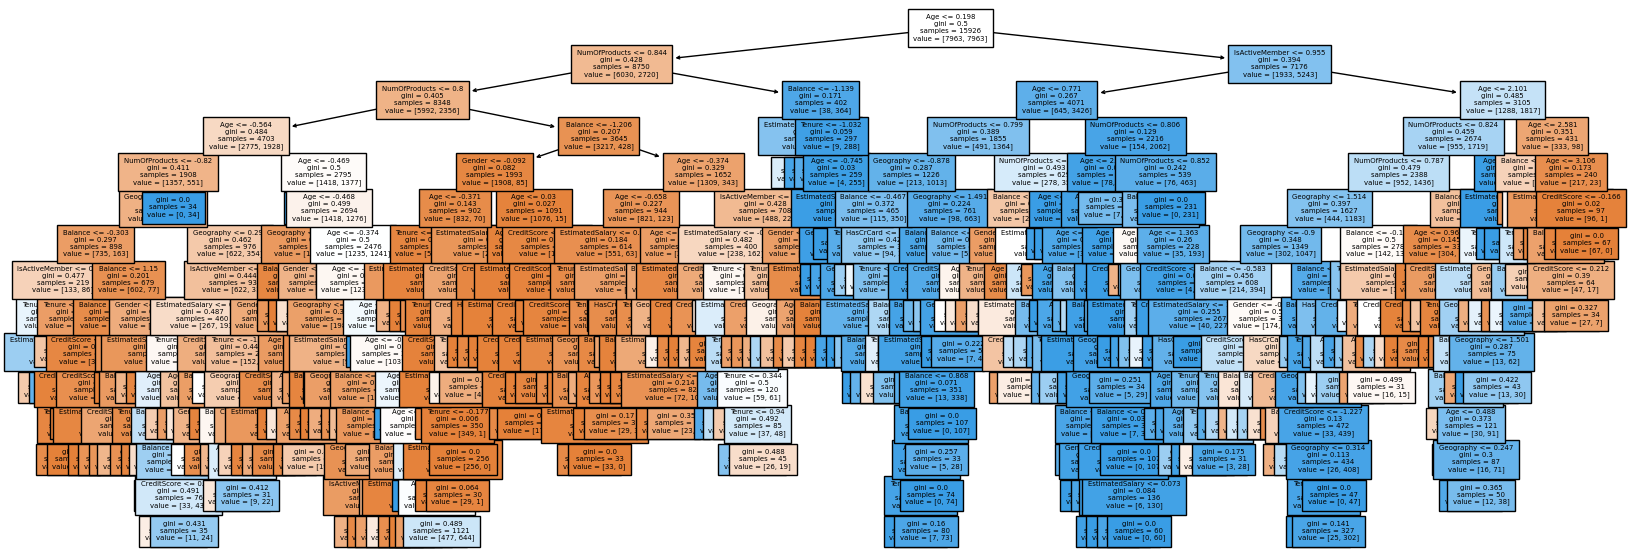

In [85]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_bal_model,feature_names=x1.columns,filled=True,fontsize=5)
plt.show()

### bal - random forest

In [86]:
param_grid_bal={"n_estimators":np.arange(20,101,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [87]:
rf_bal = RandomForestClassifier()

In [88]:
grid_cv_bal=GridSearchCV(rf_bal,param_grid_bal,cv=kf,scoring="precision")

In [89]:
grid_cv_bal.fit(x1,y1)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='precision')

In [90]:
grid_cv_bal.best_score_

0.8676394645010715

In [91]:
grid_cv_bal.best_params_

{'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [92]:
grid_cv_bal.best_estimator_

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=10)

In [93]:
rfbal_model = RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=10,n_estimators=100)
rfbal_model.fit(x1,y1)

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=10)

In [94]:
rfb_actrain = rfbal_model.score(X1_train, y1_train)
rfb_actest = rfbal_model.score(X1_test, y1_test)

print("rf_train_acc_score", rfb_actrain)
train_accrcy_score.append(rfb_actrain)

print("rf_test_acc_score", rfb_actest)
test_accrcy_score.append(rfb_actest)

rf_train_acc_score 0.90410836024399
rf_test_acc_score 0.9058183340309753


In [95]:
y_predbalrf=rfbal_model.predict(X1_test)

In [96]:
f1bal_test = f1_score(y1_test, y_predbalrf)
test_f1_score.append(f1bal_test)

print("f1_test_score", f1bal_test)

f1_test_score 0.9047820567075752


In [97]:
rf_precision = precision_score(y1_test,y_predbalrf)
precision.append(rf_precision)
print("Model precision_score :",rf_precision)

Model precision_score : 0.9005897219882055


In [98]:
rf_recall=recall_score(y1_test,y_predbalrf)
recall.append(rf_recall)
print("Model recall_score :",rf_recall)

Model recall_score : 0.9090136054421769


In [99]:
ac_rc_score_rf = roc_auc_score(y1_test, y_predbalrf)
auc_roc.append(ac_rc_score_rf)
print(ac_rc_score_rf)

0.9058670665298271


In [100]:
print(confusion_matrix(y1_test,y_predbalrf))

[[2190  236]
 [ 214 2138]]


In [101]:
print(classification_report(y1_test,y_predbalrf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2426
           1       0.90      0.91      0.90      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



### Bal - Ada Boost

In [102]:
ada = AdaBoostClassifier()

In [103]:
param_grid_ada_bal={"n_estimators":np.arange(10,101,10),
            "learning_rate":np.arange(0.05,1,0.05)
}

In [104]:
grid_cv2_bal = GridSearchCV(ada,param_grid_ada_bal,cv=kf,scoring="precision")


In [105]:
grid_cv2_bal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='precision')

In [106]:
grid_cv2_bal.best_params_

{'learning_rate': 0.9500000000000001, 'n_estimators': 100}

In [107]:
grid_cv2_bal.best_estimator_

AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100)

In [108]:
grid_cv2_bal.best_score_

0.8493077829873158

In [109]:
bal_ada_model = AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100,random_state=42)
bal_ada_model.fit(x1,y1)


AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100,
                   random_state=42)

In [110]:
ad_bal_actrain = bal_ada_model.score(X1_train, y1_train)
ad_bal_actest = bal_ada_model.score(X1_test, y1_test)

print("ad_train_acc_score", ad_bal_actrain)
train_accrcy_score.append(ad_bal_actrain)
print("ad_test_acc_score", ad_bal_actest)
test_accrcy_score.append(ad_bal_actest)

ad_train_acc_score 0.8434696806602081
ad_test_acc_score 0.8467978233570531


In [111]:
y_pred_ad_bal = bal_ada_model.predict(X1_test)

In [112]:
ad_precision = precision_score(y1_test,y_pred_ad_bal)
precision.append(ad_precision)
print("Model precision_score :",ad_precision)

Model precision_score : 0.8464499572284003


In [113]:
ad_recall=recall_score(y1_test,y_pred_ad_bal)
recall.append(ad_recall)
print("Model recall_score :",ad_recall)

Model recall_score : 0.8414115646258503


In [114]:
f1ada_test = f1_score(y1_test, y_pred_ad_bal)
test_f1_score.append(f1ada_test)

print("f1_test_score", f1ada_test)

f1_test_score 0.8439232409381663


In [115]:
ac_rc_score_ad = roc_auc_score(y1_test, y_pred_ad_bal)
auc_roc.append(ac_rc_score_ad)
print(ac_rc_score_ad)

0.8467156751406251


In [116]:
print(confusion_matrix(y1_test,y_pred_ad_bal))

[[2067  359]
 [ 373 1979]]


In [117]:
print(classification_report(y1_test,y_pred_ad_bal))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2426
           1       0.85      0.84      0.84      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



## KNN

In [118]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsClassifier(k),X1_train, y1_train,scoring="accuracy",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [119]:
for k in range(2,25):
    print("number of neighbors:",k,":",r2_scores[k-2])

number of neighbors: 2 : 0.8641019419917235
number of neighbors: 3 : 0.8443668157411375
number of neighbors: 4 : 0.83970169011421
number of neighbors: 5 : 0.8245418022117743
number of neighbors: 6 : 0.8249906753013174
number of neighbors: 7 : 0.8175448380198244
number of neighbors: 8 : 0.8179041054827618
number of neighbors: 9 : 0.8126118209416437
number of neighbors: 10 : 0.8122532374911231
number of neighbors: 11 : 0.8068714277954481
number of neighbors: 12 : 0.8085757855580837
number of neighbors: 13 : 0.8013997710570205
number of neighbors: 14 : 0.8022067447647903
number of neighbors: 15 : 0.7989778037970736
number of neighbors: 16 : 0.7989771197846568
number of neighbors: 17 : 0.7922501795532594
number of neighbors: 18 : 0.7940436601102064
number of neighbors: 19 : 0.7895587918731277
number of neighbors: 20 : 0.7887514560411374
number of neighbors: 21 : 0.7866882734118338
number of neighbors: 22 : 0.7841766200532323
number of neighbors: 23 : 0.7833693646932909
number of neighbors:

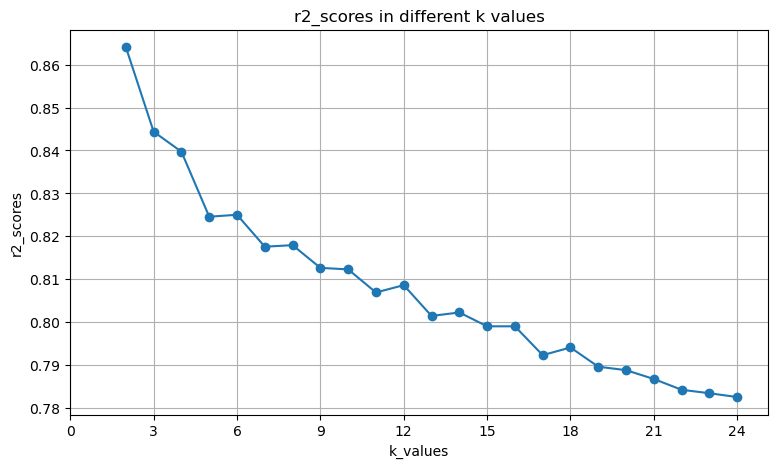

In [120]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [121]:
k= 3
kn_model = KNeighborsClassifier(k).fit(X1_train, y1_train)
y_pred5_kn = kn_model.predict(X1_test)

In [122]:
kn_actrain = kn_model.score(X1_train, y1_train)
kn_actest = kn_model.score(X1_test, y1_test)

print("kn_train_acc_score", kn_actrain)
train_accrcy_score.append(kn_actrain)
print("kn_test_acc_score", kn_actest)
test_accrcy_score.append(kn_actest)

kn_train_acc_score 0.9261750986724077
kn_test_acc_score 0.857262452909167


In [123]:
f1_test = f1_score(y1_test, y_pred5_kn)
test_f1_score.append(f1_test)

print("f1_test_score", f1_test)

f1_test_score 0.8676242236024845


In [124]:
kn_precision = precision_score(y1_test,y_pred5_kn)
precision.append(kn_precision)
print("Model precision_score :",kn_precision)

Model precision_score : 0.7982142857142858


In [125]:
kn_recall=recall_score(y1_test,y_pred5_kn)
recall.append(kn_recall)
print("Model recall_score :",kn_recall)

Model recall_score : 0.9502551020408163


In [126]:
ac_rc_score_kn = roc_auc_score(y1_test, y_pred5_kn)
auc_roc.append(ac_rc_score_kn)
print(ac_rc_score_kn)

0.8586807249692952


In [127]:
print(confusion_matrix(y1_test,y_pred5_kn))

[[1861  565]
 [ 117 2235]]


In [128]:
print(classification_report(y1_test,y_pred5_kn))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2426
           1       0.80      0.95      0.87      2352

    accuracy                           0.86      4778
   macro avg       0.87      0.86      0.86      4778
weighted avg       0.87      0.86      0.86      4778



## Stacking 

In [129]:
level1=[]
level1.append(("lr",lr_bal_model))
level1.append(("svr",SVC()))
level1.append(("dt",dt_bal_model))
level1.append(("rnd",rfbal_model))
level1.append(("ada", bal_ada_model))
level2=LogisticRegression() 
stack_model_bal=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [130]:
level1

[('lr', LogisticRegression()),
 ('svr', SVC()),
 ('dt',
  DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=10)),
 ('rnd',
  RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=10)),
 ('ada',
  AdaBoostClassifier(learning_rate=0.9500000000000001, n_estimators=100,
                     random_state=42))]

In [131]:
st_model_bal =stack_model_bal.fit(X1_train, y1_train)
y_pred_stbal = st_model_bal.predict(X1_test)

In [132]:
stbal_actrain = st_model_bal.score(X1_train, y1_train)
stbal_actest = st_model_bal.score(X1_test, y1_test)

print("kn_train_acc_score", stbal_actrain)
train_accrcy_score.append(stbal_actrain)
print("kn_test_acc_score", stbal_actest)
test_accrcy_score.append(stbal_actest)

kn_train_acc_score 0.9055435952637244
kn_test_acc_score 0.8620761825031394


In [133]:
f1_test_stbal = f1_score(y1_test, y_pred_stbal)
test_f1_score.append(f1_test_lrbal)

print("f1_test_score", f1_test_stbal)

f1_test_score 0.8612923595032626


In [134]:
st_precision = precision_score(y1_test,y_pred_stbal)
precision.append(st_precision)
print("Model precision_score :",st_precision)

Model precision_score : 0.8528553563984994


In [135]:
st_recall=recall_score(y1_test,y_pred_stbal)
recall.append(st_recall)
print("Model recall_score :",st_recall)

Model recall_score : 0.8698979591836735


In [136]:
ac_rc_score_st = roc_auc_score(y1_test, y_pred_stbal)
auc_roc.append(ac_rc_score_st)
print(ac_rc_score_st)

0.8621954758820265


In [137]:
print(confusion_matrix(y1_test,y_pred_stbal))

[[2073  353]
 [ 306 2046]]


In [138]:
print(classification_report(y1_test,y_pred_stbal))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2426
           1       0.85      0.87      0.86      2352

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



**Summary:**

In [139]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score", "roc_auc Score"]

In [140]:
auc_roc

[0.7040995087235224,
 0.7451112452400581,
 0.8527393851192578,
 0.9058670665298271,
 0.8467156751406251,
 0.8586807249692952,
 0.8621954758820265]

In [141]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],train_accrcy_score[i],train_accrcy_score[i],precision[i],recall[i],test_f1_score[i], auc_roc[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score,roc_auc Score
0,Logistic Regression,0.704431,0.704431,0.696563,0.706633,0.701562,0.704100
1,Gaussian Model,0.744080,0.744080,0.738235,0.747024,0.742604,0.745111
2,Decision Tree classifier,0.843918,0.843918,0.845059,0.857993,0.851477,0.852739
3,Random Forest classifier,0.904108,0.904108,0.900590,0.909014,0.904782,0.905867
4,Ada-boost classifier,0.843470,0.843470,0.846450,0.841412,0.843923,0.846716
5,KNN classifier,0.926175,0.926175,0.798214,0.950255,0.867624,0.858681
6,Stacked classifier,0.905544,0.905544,0.852855,0.869898,0.701562,0.862195


In [142]:
rvse_list = list(final_results['Models'])
rvse_list

['Logistic Regression',
 'Gaussian Model',
 'Decision Tree classifier',
 'Random Forest classifier',
 'Ada-boost classifier',
 'KNN classifier',
 'Stacked classifier']

In [143]:
rvse_list.reverse()

In [144]:
rvse_list

['Stacked classifier',
 'KNN classifier',
 'Ada-boost classifier',
 'Random Forest classifier',
 'Decision Tree classifier',
 'Gaussian Model',
 'Logistic Regression']

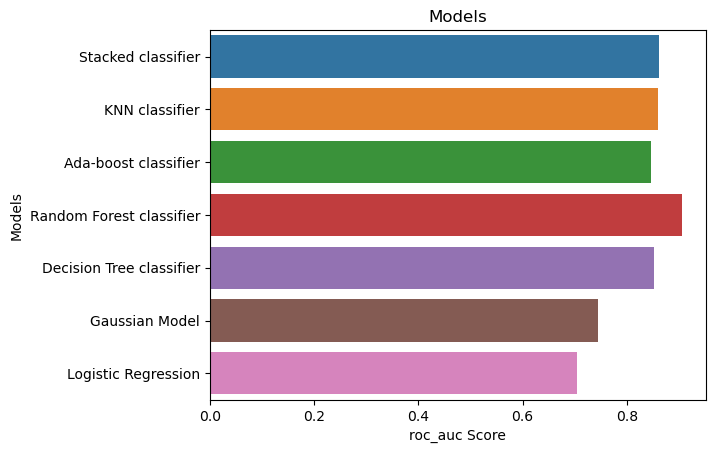

In [145]:
models = final_results['Models']
test_score = final_results['roc_auc Score']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
# plt.xlabel('Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# Over all 'Random Forest Classifier Model' outperformed 'Decision Tree Regressor', roc_auc score is 90%